In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
stations = gpd.read_file('tables/epp.geojson')
stations = stations.drop('index', axis=1)
stations.head(2)

,xtf_id,Address,PostCode,Commune,Canton_short,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,CELLCODE,Municipality,District,Canton,geometry
0,5646,Rue des Creusets 41,1948,Fionnay,VS,1958-03-07,1872000.0,1872000.0,Hydroelectric power,Hydroelectric power,Pumped storage power plant,1kmE4112N2550,Bagnes,Entremont,Valais,POINT (4112371.918 2550159.690)
1,9744,-,1934,Le Châble,VS,2007-12-20,350.0,350.0,Hydroelectric power,Hydroelectric power,Wastewater power plant,1kmE4104N2556,Bagnes,Entremont,Valais,POINT (4104455.502 2556273.398)


In [3]:
stats = pd.read_csv('tables/stadistics.csv')
stats = stats.drop('Unnamed: 0', axis=1)
stats.head(2)

,Canton,District,Municipality,SubCategory,Count,TotalPower
0,Aargau,Aarau,Aarau,Biomass,1,380.0
1,Aargau,Aarau,Aarau,Hydroelectric power,3,26854.0


In [4]:
stats.query('SubCategory == "Photovoltaic"').groupby('District').sum().sort_values('Count', ascending = False)

,Count,TotalPower
District,,
Genève,2513,61377.41
La Sarine,2236,40227.44
Jura-North Vaudois,2150,41309.89
Rheintal,1977,38601.26
Lugano,1940,29623.86
...,...,...
Goms,41,816.48
Bettingen,27,471.45
Bodensee,26,2347.75


In [5]:
gen_pv = stations.query('(SubCategory == "Photovoltaic") & (District == "Genève")')
gen_pv.head(2)

,xtf_id,Address,PostCode,Commune,Canton_short,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,CELLCODE,Municipality,District,Canton,geometry
79063,6153,chemin du Champ-des-Filles 36,1228,Plan-les-Ouates,GE,2007-12-20,572.3,572.3,Other renewable energies,Photovoltaic,Attached,1kmE4019N2569,Plan-les-Ouates,Genève,Genève,POINT (4019875.546 2569190.709)
79064,8995,Route des Chevaliers-de-Malte 65,1228,Plan-les-Ouates,GE,2002-06-26,1.7,1.7,Other renewable energies,Photovoltaic,NaN,1kmE4021N2568,Plan-les-Ouates,Genève,Genève,POINT (4021587.304 2568900.210)


In [6]:
gen_pv = gen_pv.to_crs('epsg:2056')
gen_pv.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Liechtenstein; Switzerland.
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [7]:
a2 = gpd.read_file('tables/cantons.geojson')
a3 = gpd.read_file('tables/districts.geojson')

a2 = a2.to_crs('epsg:2056')
a3 = a3.to_crs('epsg:2056')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

In [9]:
mx = a3[a3.District == 'Genève']

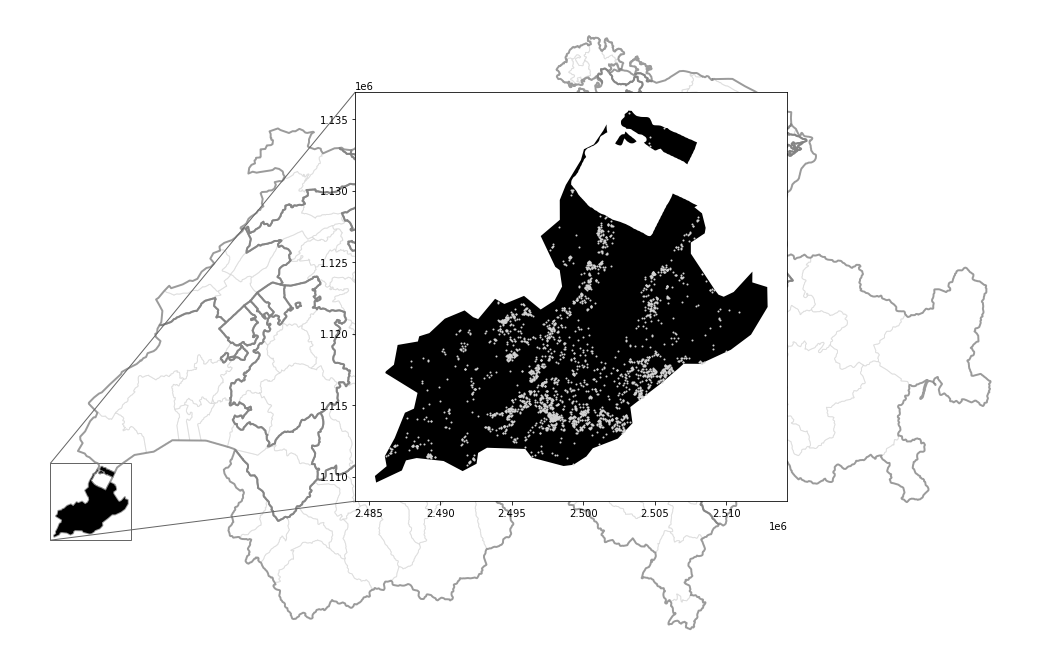

In [10]:
fig, ax = plt.subplots(figsize=(20, 12))

a2.boundary.plot(linewidth = 2, ax = ax, zorder =2, edgecolor = 'gray', alpha=0.75)
a3.boundary.plot(linewidth = 1, ax = ax, zorder =1, edgecolor = 'lightgray', alpha=0.5)
mx.plot(ax = ax, zorder = 4, color = 'black')

axins = inset_axes(ax, 6, 6, loc = 1, bbox_to_anchor=(0.7, 0.8),
                   bbox_transform = ax.figure.transFigure)

mx.plot(ax = axins, zorder = 1, color = 'black')
gen_pv.plot(ax = axins, zorder = 2, color = 'lightgrey', markersize = 1)

mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec = "0.4")

ax.axis('off')
plt.show()

In [11]:
gen_pv.groupby('PostCode').size().sort_values(ascending = False)

PostCode
1228    209
1226    175
1217    146
1233    124
1213    121
       ... 
1283      6
1298      4
1215      4
1295      1
1299      1
Length: 62, dtype: int64

In [12]:
is_1228 = ['orangered' if station  ==  1228 else 'lightgray' for station in gen_pv['PostCode']]

In [13]:
pv_1228 = gen_pv.query('PostCode == "1228"')

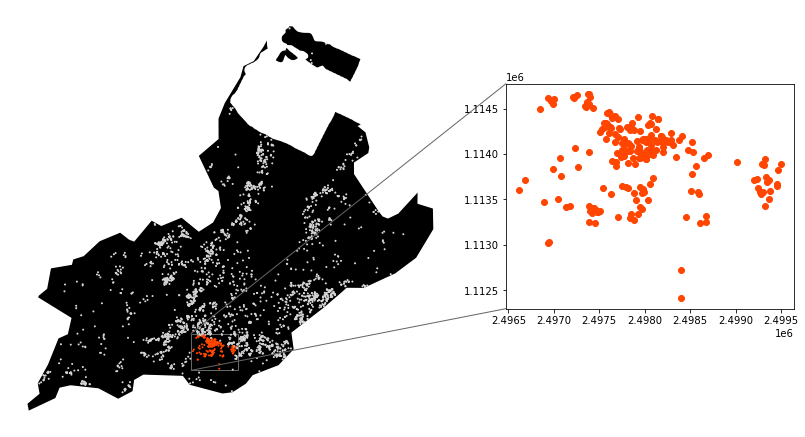

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

mx.plot(ax = ax, zorder = 1, color = 'black')
gen_pv.plot(ax = ax, zorder = 2, markersize = 1, color = is_1228)

axins = inset_axes(ax, 4, 4, loc = 1, bbox_to_anchor=(1.5, 0.8),
                   bbox_transform = ax.figure.transFigure)
pv_1228.plot(ax = axins, color = 'orangered')

mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec = "0.4")

ax.axis('off')
plt.show()

In [15]:
pv_1228.head(2)

,xtf_id,Address,PostCode,Commune,Canton_short,BeginningOfOperation,InitialPower,TotalPower,MainCategory,SubCategory,PlantCategory,CELLCODE,Municipality,District,Canton,geometry
79063,6153,chemin du Champ-des-Filles 36,1228,Plan-les-Ouates,GE,2007-12-20,572.3,572.3,Other renewable energies,Photovoltaic,Attached,1kmE4019N2569,Plan-les-Ouates,Genève,Genève,POINT (2496891.000 1113467.001)
79064,8995,Route des Chevaliers-de-Malte 65,1228,Plan-les-Ouates,GE,2002-06-26,1.7,1.7,Other renewable energies,Photovoltaic,NaN,1kmE4021N2568,Plan-les-Ouates,Genève,Genève,POINT (2498610.000 1113237.001)


In [16]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [17]:
pv_1228_ri = pv_1228.reset_index()

In [18]:
ls_0 = []

for i in pv_1228_ri.iterrows():
    ls_0.append([i[1][16].x, i[1][16].y])

X = np.array(ls_0)

In [19]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [20]:
indices

array([[  0,   7,   8, ..., 179, 208, 207],
       [  1,   3,   5, ..., 142,   6, 113],
       [  2,   1,   5, ..., 113, 142,  54],
       ...,
       [206, 173, 205, ..., 201, 203, 197],
       [207, 208,   8, ..., 176,  85,  83],
       [208, 207,   8, ..., 176,  85,  83]], dtype=int64)

In [21]:
import networkx as nx

In [22]:
class station():
    def __init__(self, name):
        self.name = name
        self.coords = (0,0)

In [23]:
nodes_list = []

for i in pv_1228_ri.iterrows():
    a = station(i[0])
    a.coords = (i[1][16].x, i[1][16].y)
    
    nodes_list.append(a)

In [24]:
nodes = {node.name:node.coords for node in nodes_list}

In [25]:
nodes

{0: (2496891.0004785093, 1113467.00065599),
 1: (2498610.000480369, 1113237.0006554567),
 2: (2498455.0004801922, 1113305.0006555482),
 3: (2498676.0004804353, 1113253.0006554585),
 4: (2498398.000480308, 1112412.0006547803),
 5: (2498669.0004804153, 1113318.0006555128),
 6: (2498403.000480253, 1112719.0006550492),
 7: (2497051.000478671, 1113507.0006559943),
 8: (2497136.000478779, 1113413.0006559065),
 9: (2497898.0004794886, 1113892.0006561647),
 10: (2497558.0004790504, 1114296.0006565882),
 11: (2497752.000479305, 1114043.0006563354),
 12: (2497745.000479375, 1113651.000655989),
 13: (2497689.000479272, 1113872.000656193),
 14: (2497635.0004792064, 1113918.0006562425),
 15: (2497679.0004792525, 1113917.0006562306),
 16: (2497769.0004793284, 1114016.0006563044),
 17: (2497792.00047935, 1114030.0006563098),
 18: (2497815.000479453, 1113629.0006559559),
 19: (2497770.0004793005, 1114162.0006564257),
 20: (2497876.000479453, 1113958.000656224),
 21: (2497511.0004791818, 1113377.000655

In [26]:
H = nx.Graph() 
H.add_nodes_from(nodes)

In [27]:
H.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208))

In [28]:
links = []

for i in indices:
    for j in range(9):
        links.append((i[0],i[j+1])) 

In [29]:
H.add_edges_from(links)

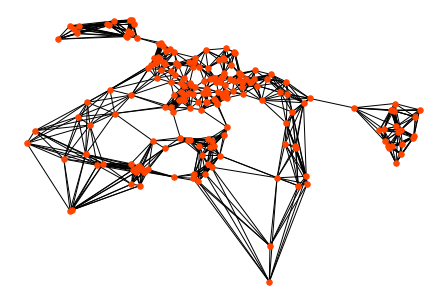

In [30]:
nx.draw(H, pos=nodes, with_labels = False, node_color='orangered', node_size=30)
plt.show()

In [31]:
far_n = []

for i in range(len(distances)):
    far_n.append(distances[i][-1])

In [32]:
np.array(far_n)

array([ 447.37121092,  631.96202492,  488.73714872,  627.71331095,
       1071.98600849,  633.31587752,  811.14055596,  397.39778605,
        298.73901689,  144.0069444 ,   65.00769192,   77.02596971,
        233.41808012,  182.23611073,  183.61372518,  145.61936696,
         82.21921923,   81.32035422,  196.86543645,  118.59595284,
        103.09704178,  112.00446431,  166.20770156,   75.92759716,
        130.35720171,   86.31338259,  309.58359158,  262.29182242,
        113.17243489,   88.19297034,  403.15009644,   89.88882032,
         96.54014716,  196.46882727,   84.8999412 ,   86.82165639,
        160.11246066,   66.09841156,   98.22932363,   80.44874151,
        234.77648964,   86.45229905,   86.31338258,   99.63934973,
        107.93516585,  166.20770156,   82.49242399,  145.24806384,
         87.3155199 ,   82.21921926,   70.83078435,   67.26812029,
        114.82595539,  270.9464895 ,  185.52897364,  114.96521226,
        105.72133191,  252.53316634,   82.21921923,   67.20119

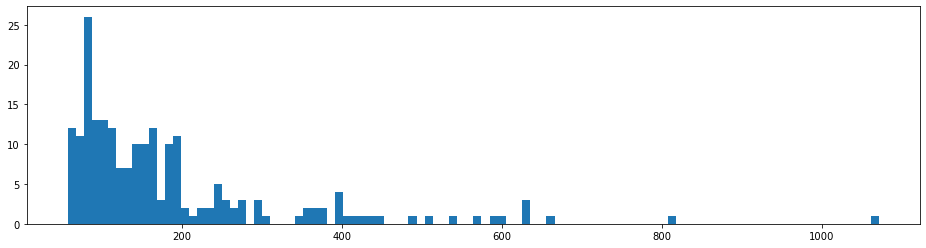

In [44]:
fig, ax = plt.subplots(figsize=(16, 4))

plt.hist(np.array(far_n), bins=100)
plt.show()